In [24]:
# Imports
%matplotlib qt
import mne
import os
import numpy as np

In [2]:
# Set up paths

# This base path will need updating
base_path = '/Users/luyandamdanda/Documents/Research/EEG_Dat'

# These should stay the same
#subj_dat_fname = '._3502_resampled.set'
subj_dat_fname = '3502_resampled.set'

In [3]:
# Read in subject listed above

ev_dict = {'Start Block': 1001., 'End Block': 1002., 'Start Labelling Block':1003., 'End Labelling Block':1004}
# event dictionary to ensure "Start Block" and "End Block"

full_path = os.path.join(base_path, subj_dat_fname)
eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)

Events like the following will be dropped entirely: ['Sham_Pres_threshold', 'Peak_Pres_thresh', 'Label_Undetected_thresh', 'SPACE pressed', 'Sham_Pres_sham'], 37 in total
2334/3068 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
Reading /Users/luyandamdanda/Documents/Research/EEG_Dat/3502_resampled.fdt


<ipython-input-3-693e87f92b96>:7: RuntimeWarning: Events like the following will be dropped entirely: ['Sham_Pres_threshold', 'Peak_Pres_thresh', 'Label_Undetected_thresh', 'SPACE pressed', 'Sham_Pres_sham'], 37 in total
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)
<ipython-input-3-693e87f92b96>:7: RuntimeWarning: 2334/3068 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)


In [4]:
eeg_dat.info

<Info | 16 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : numpy.ndarray | 1969-12-31 16:00:00
    nchan : int | 65
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : No

In [5]:
eeg_dat.set_eeg_reference()
# set EEG average reference

Adding average EEG reference projection.
1 projection items deactivated


<RawEEGLAB  |  3502_resampled.fdt, n_channels x n_times : 65 x 1760157 (3520.3 sec), ~140 kB, data not loaded>

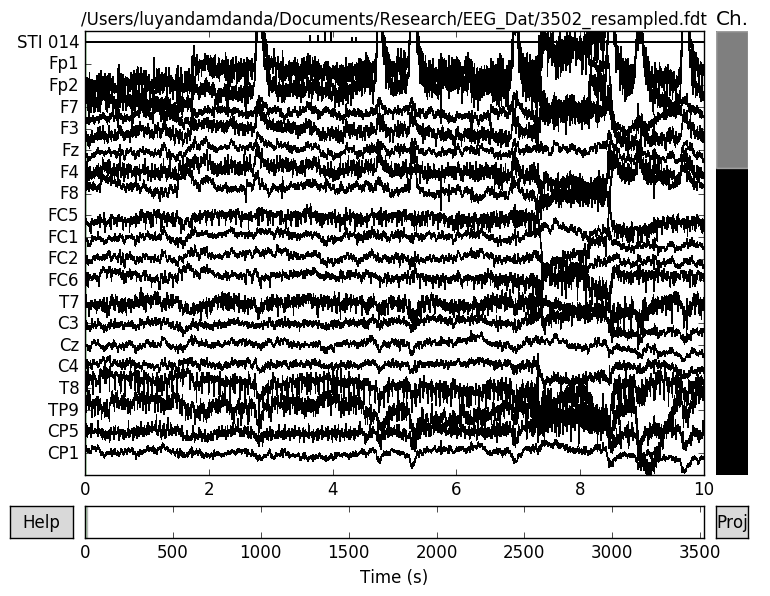

In [6]:
eeg_dat.plot()

In [7]:
# identifying all the events and IDs
mne.find_events(eeg_dat)

371 events found
Events id: [   1    2    3    5   10 1001 1002 1003 1004]


array([[   1820,       0,       3],
       [   1880,       0,       3],
       [   1940,       0,       5],
       ..., 
       [1741629,       0,      10],
       [1748249,       0,      10],
       [1755097,       0,    1002]])

371 events found
Events id: [   1    2    3    5   10 1001 1002 1003 1004]
Found %s events.
()
event 1 missing from event_id will be ignored
event 2 missing from event_id will be ignored
event 3 missing from event_id will be ignored
event 5 missing from event_id will be ignored
event 10 missing from event_id will be ignored
event 1003 missing from event_id will be ignored
event 1004 missing from event_id will be ignored


<ipython-input-8-455896c44353>:12: RuntimeWarning: event 1 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-455896c44353>:12: RuntimeWarning: event 2 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-455896c44353>:12: RuntimeWarning: event 3 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-455896c44353>:12: RuntimeWarning: event 5 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-455896c44353>:12: RuntimeWarning: event 10 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-455896c44353>:12: RuntimeWarning: event 1003 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-8-455896c44353>:12: RuntimeWarning: event 1004 missing from event_id will be ignored
  event_id=event_id)


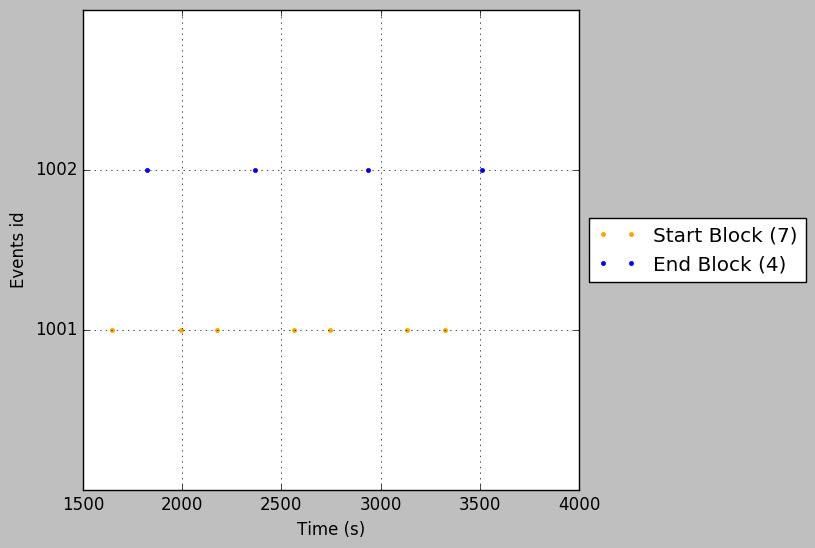

In [8]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Start Block': 1001, 'End Block': 1002,}
color = {1001:'orange', 1002:'blue'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id)

In [9]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, name = "Epochs created on Start and End Events")

name is deprecated and will be removed in 0.15.
11 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-9-a2c0ac2c27b0>:1: RuntimeWarning: name is deprecated and will be removed in 0.15.
  epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, name = "Epochs created on Start and End Events")


<h1> Woop woop </h1>
<h3> 11 matching events, this seems very promosing </h3>

371 events found
Events id: [   1    2    3    5   10 1001 1002 1003 1004]
Found %s events.
()
event 1 missing from event_id will be ignored
event 2 missing from event_id will be ignored
event 3 missing from event_id will be ignored
event 5 missing from event_id will be ignored
event 10 missing from event_id will be ignored
event 1001 missing from event_id will be ignored
event 1002 missing from event_id will be ignored


<ipython-input-10-9bdb7eb15c97>:12: RuntimeWarning: event 1 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-10-9bdb7eb15c97>:12: RuntimeWarning: event 2 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-10-9bdb7eb15c97>:12: RuntimeWarning: event 3 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-10-9bdb7eb15c97>:12: RuntimeWarning: event 5 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-10-9bdb7eb15c97>:12: RuntimeWarning: event 10 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-10-9bdb7eb15c97>:12: RuntimeWarning: event 1001 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-10-9bdb7eb15c97>:12: RuntimeWarning: event 1002 missing from event_id will be ignored
  event_id=event_id)


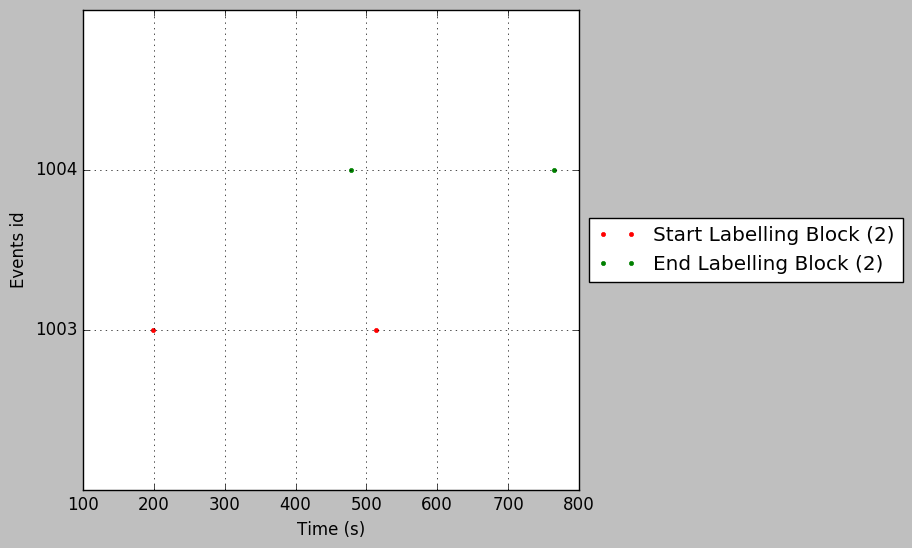

In [10]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Start Labelling Block':1003, 'End Labelling Block':1004}
color = {1003:'red', 1004:'green'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id)

In [11]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, name = "Epochs created on Start and End Rest Events")

name is deprecated and will be removed in 0.15.
4 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-11-ec8bb6350a58>:1: RuntimeWarning: name is deprecated and will be removed in 0.15.
  epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, name = "Epochs created on Start and End Rest Events")


Loading data for 4 events and 351 original time points ...
0 bad epochs dropped
Loading data for 4 events and 351 original time points ...


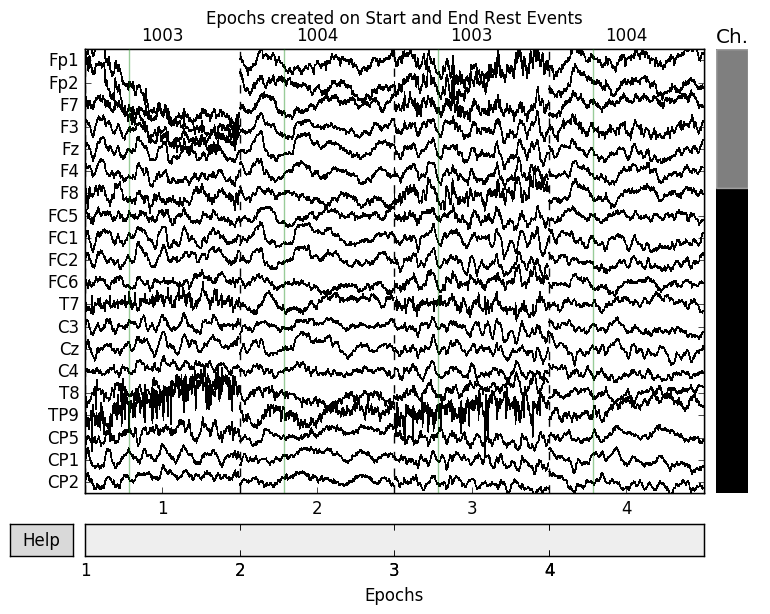

In [12]:
epochs.plot()

# Marking bad channels
### Based on visualization.


In [13]:
eeg_dat.info['bads'] = ['TP9']

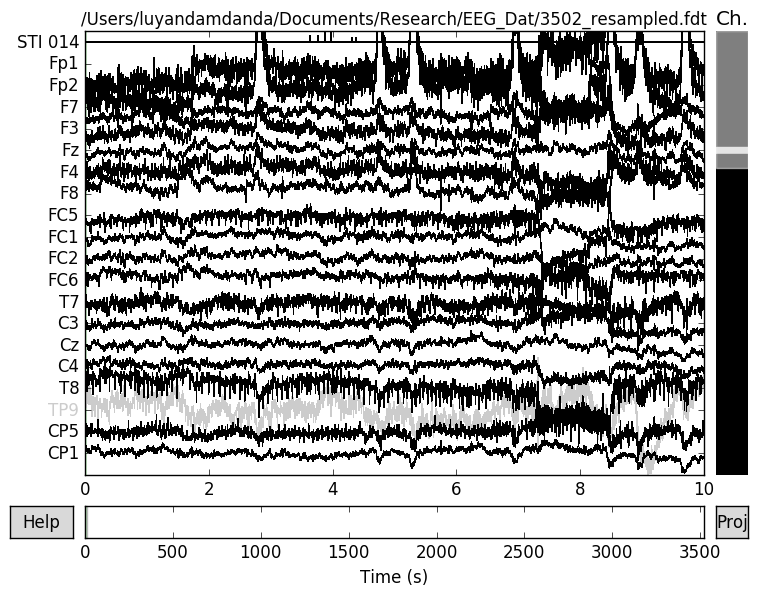

In [14]:
# plot with bads
eeg_dat.plot()

In [15]:
print('Bad channels: ', eeg_dat.info['bads'])

('Bad channels: ', ['TP9'])


In [16]:
eeg_dat.info

<Info | 16 non-empty fields
    bads : list | TP9
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : numpy.ndarray | 1969-12-31 16:00:00
    nchan : int | 65
    projs : list | Average EEG reference: off
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplot

# Marking bad moments
### Identifying bad moments based on visualization

In [ ]:
# Not to critical for this data

# Re-referencing to average

371 events found
Events id: [   1    2    3    5   10 1001 1002 1003 1004]
Found %s events.
()
event 1 missing from event_id will be ignored
event 2 missing from event_id will be ignored
event 3 missing from event_id will be ignored
event 5 missing from event_id will be ignored
event 10 missing from event_id will be ignored
event 1001 missing from event_id will be ignored
event 1002 missing from event_id will be ignored


<ipython-input-17-9bdb7eb15c97>:12: RuntimeWarning: event 1 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-17-9bdb7eb15c97>:12: RuntimeWarning: event 2 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-17-9bdb7eb15c97>:12: RuntimeWarning: event 3 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-17-9bdb7eb15c97>:12: RuntimeWarning: event 5 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-17-9bdb7eb15c97>:12: RuntimeWarning: event 10 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-17-9bdb7eb15c97>:12: RuntimeWarning: event 1001 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-17-9bdb7eb15c97>:12: RuntimeWarning: event 1002 missing from event_id will be ignored
  event_id=event_id)


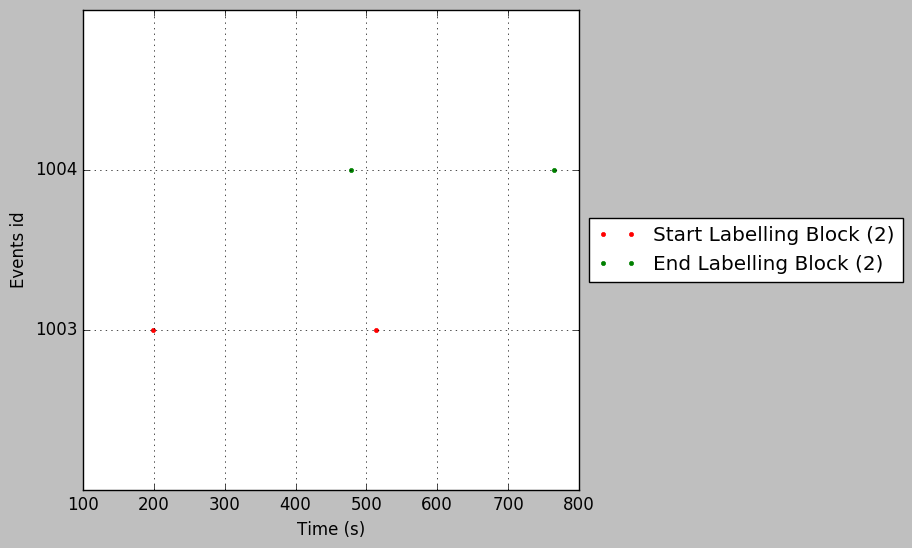

In [17]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Start Labelling Block':1003, 'End Labelling Block':1004}
color = {1003:'red', 1004:'green'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id)

In [ ]:
mne.Epochs?

In [18]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, tmin = 5, tmax = 125, baseline = None, name = "Epochs created on Start and End Rest Events")

name is deprecated and will be removed in 0.15.
4 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-18-5b6ce3209c63>:1: RuntimeWarning: name is deprecated and will be removed in 0.15.
  epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, tmin = 5, tmax = 125, baseline = None, name = "Epochs created on Start and End Rest Events")


In [ ]:
epochs.plot?

In [ ]:
epochs.plot(n_epochs = 1)

In [19]:
epochs.drop_bad()

Loading data for 4 events and 60001 original time points ...
0 bad epochs dropped


<Epochs  |  n_events : 4 (all good), tmin : 5.0 (s), tmax : 125.0 (s), baseline : None, ~140 kB, data not loaded,
 'End Labelling Block': 2, 'Start Labelling Block': 2>

Loading data for 4 events and 60001 original time points ...


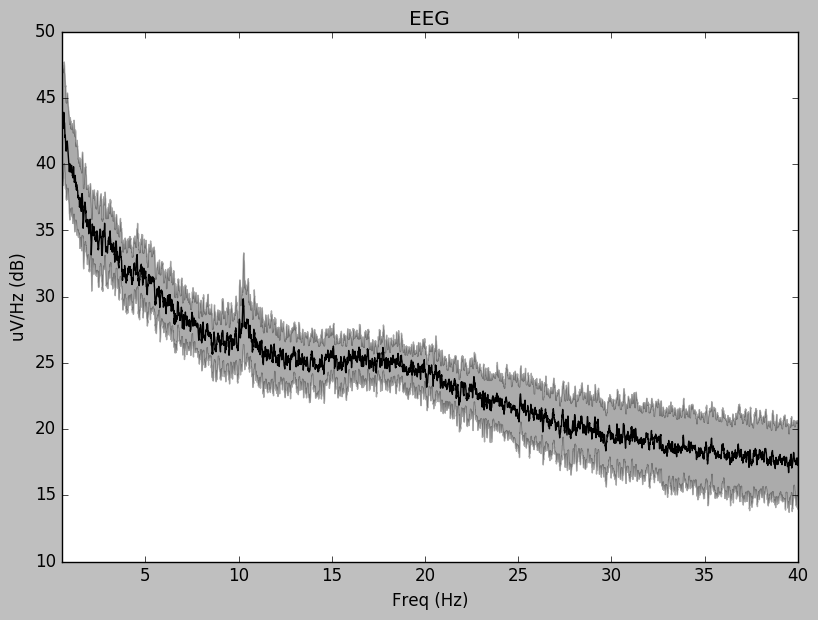

In [20]:
epochs.plot_psd(fmin = 0.5 ,fmax = 40)

In [21]:
mne.time_frequency.psd_welch

In [25]:
# Calculate PSDs
psds, freqs = mne.time_frequency.psd_welch(epochs, fmin=1., fmax=40.)

# Average PSDs for each channel across each rest block
avg_psds = np.mean(psds, axis=0)

Loading data for 4 events and 60001 original time points ...
Effective window size : 0.512 (s)


In [26]:
print(psds)

[[[  2.20642983e-11   7.24427852e-12   1.92166713e-12 ...,   1.31568356e-13
     1.31589250e-13   1.17134857e-13]
  [  2.35896530e-11   7.68933041e-12   2.02600535e-12 ...,   1.36176256e-13
     1.26697806e-13   1.31750197e-13]
  [  6.83783991e-12   3.44307651e-12   1.59332196e-12 ...,   7.80940122e-14
     6.89718019e-14   6.23096880e-14]
  ..., 
  [  4.84268864e-12   3.50742407e-12   2.89309701e-12 ...,   6.75975635e-14
     5.32014502e-14   5.09909560e-14]
  [  4.51771058e-12   3.02750254e-12   2.28742805e-12 ...,   7.72431224e-14
     6.84255005e-14   6.00762876e-14]
  [  7.25809203e-12   4.52394625e-12   3.22119427e-12 ...,   1.06786368e-13
     8.81915921e-14   7.95140722e-14]]

 [[  1.06692331e-10   2.86211134e-11   7.36683861e-12 ...,   2.16143161e-12
     3.22122269e-12   3.97255178e-12]
  [  6.23058085e-10   1.21693251e-10   2.84553639e-11 ...,   1.35568741e-12
     1.83612984e-12   1.83955118e-12]
  [  1.68580746e-11   5.80333642e-12   2.45996876e-12 ...,   2.44339744e-13
  

In [27]:
# Get freq res of PSD
f_res = np.mean(np.diff(freqs))

## Checking ranges

In [ ]:
import numpy as np
mins = []
maxs = []

nChans = eeg_dat.info['nchan']
nTimes = 34

dat = np.ones([nChans, nTimes])

for i in range(nChans):
   
    # Pull out a row (which is a channel)
    chan_data = eeg_dat._data[i, :]
   
    # Get the min and max of the row (channel)
    mins.append(min(chan_data))
    maxs.append(max(chan_data))

# Calculate ranges
ranges = []
for mi, ma in zip(mins, maxs):
    ranges.append(ma - mi)
    
# Calculate average range to set new threshold
avrange = sum(ranges)/len(ranges)

print(avrange)

In [ ]:
event_id = {'Start Labelling Block':1003, 'End Labelling Block':1004}
baseline = None  # means from the first instant to t = 0
reject = dict( eeg = 0.000121364317584) #used average range of channels

picks_eeg = mne.pick_types(eeg_dat.info, meg=False, eeg=True, eog=True,
                           stim=False, exclude='bads')

epochs = mne.Epochs(eeg_dat, events, event_id, tmin, tmax, proj=True,
                    picks=picks_eeg, baseline=baseline, reject = reject,
                    reject_by_annotation=True, add_eeg_ref=False) ;

events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events

color = {1003:'red', 1004:'green'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id) 